# Sklearn, Pandas and MatplotLib

- SKlearn is a libray for machine learning purposes
- Pandas is a Python Data Analysis Library
- MatpotLib is a python library to generate graphs

[Scikit Machine Learning Data Compression PCA](https://github.com/Einsteinish/bogotobogo-Machine-Learning/blob/master/scikit_machine_learning_Data_Compression_PCA.ipynb)

In [1]:
# Ensure matplotlib is installed in current environment
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Import the pandas module.

In [2]:
import pandas as pd

#### Import the data to be used using pandas library

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

#### Print the first five results (head) read form the ``wine.data`` dataset

In [4]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Create model using sklearn using the previous dataset

Sklearn provides functionality to allow machine learning. The library has functions to make inferences, linear regression, predictions, classification, etc..

Also it provides a lot of functions for statistics such as standard devation, covariance, eigenvalues, normalization, etc..

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split previous date set into inputs `x` and outputs `y` (labels)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Slit previous inputs and labels into proper dataset for training, testing and validating
#    - test_size: is the percentage to split between test (30%) and traininig (70%) data.
#    - random_state: is used to random the data to prevent overfiting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

###### StandardScaler

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

    z = (x - u) / s
    
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [6]:
# Create current model (standard scaler)
sc = StandardScaler()

# Start the training using the previous model created and the dataset
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#### Compute the covariance Matrix for the training dataset

In [7]:
covariance_matrix = np.cov(X_train_std.T)
# Print the first 6 results
covariance_matrix[0::5]

array([[ 1.00813008,  0.08797701,  0.23066952, -0.32868099,  0.2141631 ,
         0.35576761,  0.2991246 , -0.16913744,  0.09649074,  0.56962271,
        -0.04781543,  0.07403492,  0.63277882],
       [ 0.35576761, -0.30124242,  0.12235533, -0.37018442,  0.16513295,
         1.00813008,  0.88119961, -0.45396901,  0.6196806 , -0.06935051,
         0.45718802,  0.72214462,  0.56326772],
       [-0.04781543, -0.54992807, -0.10928021, -0.25313262,  0.05792599,
         0.45718802,  0.58331869, -0.3178224 ,  0.32282167, -0.52395358,
         1.00813008,  0.60022569,  0.2452794 ]])

#### Compute the eigen vectors form the previous covariance matrix

Eigenvectors are a special set of vectors associated with a linear system of equations (i.e., a matrix equation) that are sometimes also known as characteristic vectors, proper vectors, or latent vectors (Marcus and Minc 1988, p. 144). 

 The determination of the eigenvectors and eigenvalues of a system is extremely important in physics and engineering, where it is equivalent to matrix diagonalization and arises in such common applications as stability analysis, the physics of rotating bodies, and small oscillations of vibrating systems, to name only a few. Each eigenvector is paired with a corresponding so-called eigenvalue. Mathematically, two different kinds of eigenvectors need to be distinguished: left eigenvectors and right eigenvectors. However, for many problems in physics and engineering, it is sufficient to consider only right eigenvectors. The term "eigenvector" used without qualification in such applications can therefore be understood to refer to a right eigenvector.

The decomposition of a square matrix A into eigenvalues and eigenvectors is known in this work as eigen decomposition, and the fact that this decomposition is always possible as long as the matrix consisting of the eigenvectors of A is square is known as the eigen decomposition theorem. 

In [8]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
# Print the first 6 results
eigen_values, eigen_vectors[::5]

(array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
        0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
        0.16831254, 0.21432212, 0.2399553 ]),
 array([[ 1.46698114e-01,  5.04170789e-01, -1.17235150e-01,
          2.06254611e-01, -1.87815947e-01, -1.48851318e-01,
         -1.79263662e-01, -5.54687162e-02, -4.03054922e-01,
         -4.17197583e-01,  2.75660860e-01,  4.03567189e-01,
          4.13320786e-04],
        [ 3.89344551e-01,  9.36399132e-02,  1.80804417e-01,
          1.93179478e-01,  1.40645426e-01,  1.22248798e-02,
          5.31455344e-02, -4.21265116e-01,  1.35111456e-01,
         -2.80985650e-01,  2.83897644e-01, -6.18600153e-01,
          9.45645138e-02],
        [ 3.00325353e-01, -2.79243218e-01,  9.32387182e-02,
          2.41740256e-02, -3.72610811e-01,  2.16515349e-01,
         -3.84654748e-01, -1.05383688e-01, -5.17259438e-01,
          1.97814118e-01, -1.98844532e-01, -2.00456386e-01,
         -3.02254353e-01]]))

#### Generate a plot with the eigen values computed

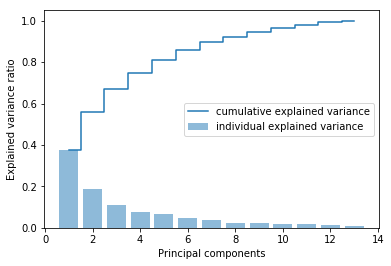

In [9]:
tot = sum(eigen_values)
var_exp = [(i / tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
ylabel('Explained variance ratio')
xlabel('Principal components')
legend(loc='best')
show()

In [10]:
# Get the pairs for the eigen values and eigen vectors
eigen_pairs = [(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)

eigen_pairs[:5]

[(4.892308303273744,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.466350315759231,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048446,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044954,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450256,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543, 

In [11]:
# Stack arrays in sequence horizontally (column wise).
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w.shape

(13, 2)

In [12]:
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [13]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [14]:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

#### Compute the PCA components from the train dataset

In [15]:
# Get the PCA components (train-set) computed from standard deviation and eigen weights
X_train_pca = X_train_std.dot(w)
# Print the current shapes of the matrices
X_train_std.shape, w.shape, X_train_pca.shape

((124, 13), (13, 2), (124, 2))

#### Plot the PCA component extracted from the dataset

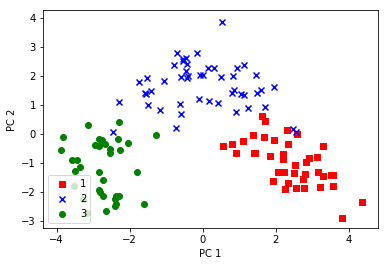

In [19]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
xlabel('PC 1')
ylabel('PC 2')
legend(loc='lower left')
show()

#### Create the clustering from the PCA computed using Linear Regression

**Clustering** is the process of grouping similar entities together. The goal of this **unsupervised machine learning** technique is to find similarities in the data point and group similar data points together.

There are many algorithms developed to implement this technique. The most popular and widely used algorithms in **unsupervised machine learning** are.

- K-mean Clustering
- Hierarchical Clustering

For this example a **Linear Regression** Model is used, since we have already computed the PCA components

In [24]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    xlim(xx1.min(), xx1.max())
    ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


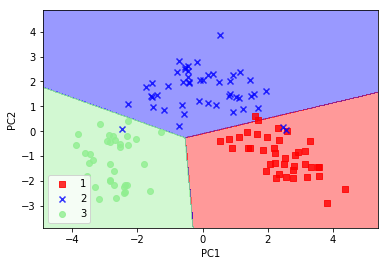

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Used solver='lbfgs' to suppress warning
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
xlabel('PC1')
ylabel('PC2')
legend(loc='lower left')
show()